In [1]:
import torch
from collections import defaultdict
import pickle
import os

import training
import benchmark


# add parent directoru path and import Snake env
import sys
sys.path.append('..')
from envs.snake import Snake

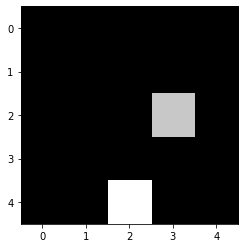

steps_without_gain: 0
direction: None
target: (4, 2)
target_distance: (2, -1)
obstacle_distance: (3, 1, 2, 2)


In [2]:
env = Snake(side=5)
env.render()

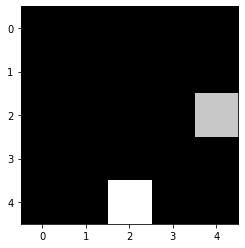

steps_without_gain: 1
direction: 3
target: (4, 2)
target_distance: (2, -2)
obstacle_distance: (4, 0, 2, 2)


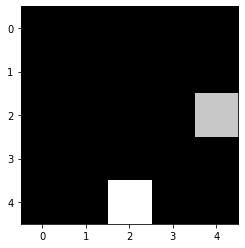

steps_without_gain: 1
direction: 3
target: (4, 2)
target_distance: (2, -2)
obstacle_distance: (4, 0, 2, 2)


In [3]:
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()

## Train model

### Create environment

In [4]:
env = Snake(side=10)

### Recover saved Q-Table if exists

In [5]:
save_file = 'Snake_saved/Snake-qtable.pkl'

if os.path.exists(save_file):
    with open(save_file, 'rb') as f:
        mk_entry = lambda: torch.zeros((env.action_space.n,))
        q_table = defaultdict(mk_entry, pickle.load(f)) 
else:
    q_table = None

### Fit Q-Table

In [6]:
best_score, q_table = training.fit(env, q_table, episodes=100_000, epsilon_min=0.1, learning_rate=0.1)

# Decrease learning rate for second run
best_score, q_table = training.fit(env, q_table=q_table, episodes=100_000, epsilon_min=0.1, learning_rate=0.01)

  0%|          | 0/100000 [00:00<?, ?it/s]

Episode 1000: New best score! 717.0
Episode 32000: New best score! 738.0
Episode 34000: New best score! 739.0
Episode 38000: New best score! 745.0
Episode 39000: New best score! 765.0
Episode 51000: New best score! 786.0
Episode 54000: New best score! 811.0
Episode 55000: New best score! 820.0
Episode 65000: New best score! 822.0
Episode 73000: New best score! 823.0
Episode 74000: New best score! 866.0
Episode 80000: New best score! 884.0
Episode 93000: New best score! 907.0
Episode 99000: New best score! 931.0



  0%|          | 0/100000 [00:00<?, ?it/s]

Episode 1000: New best score! 830.0
Episode 2000: New best score! 939.0
Episode 75000: New best score! 971.0


### Save Q-Table

In [8]:
with open(save_file, 'wb') as f:
    pickle.dump(dict(q_table), f)

### Play an episode

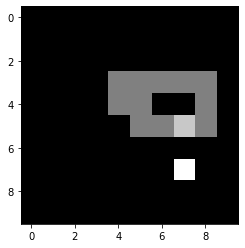

steps_without_gain: 19
direction: 3
target: (7, 7)
target_distance: (2, 0)
obstacle_distance: (0, 0, 1, 4)


In [12]:
from IPython.display import clear_output
import time
import torch

env = Snake(side=10, max_steps_without_gain=1000)
state = env.reset()
done = False
while not done:
    action = torch.argmax(q_table[state]).item()
    state, _, done, _ = env.step(action)
    clear_output()
    env.render()
    time.sleep(0.15)
    